# Import packages / Libraries

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
warnings.simplefilter(action='always', category=UserWarning)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

# Load the dataset

In [15]:
# Load dataset
# Dataset information: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE15824
url = "https://sbcb.inf.ufrgs.br/data/cumida/Genes/Brain/GSE15824/Brain_GSE15824.csv"
data = pd.read_csv(url)
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM397626.CEL.gz,Glioblastoma,9.409264,6.486642,6.849118,5.553799,2.614667,6.465026,5.468213,3.088760,...,11.117198,10.995354,12.540305,12.393756,3.000946,2.229139,2.125375,1.849213,2.164977,2.247018
1,GSM397627.CEL.gz,Glioblastoma,9.566747,7.012791,7.269160,7.016673,3.370558,7.696889,5.180409,3.299861,...,10.996753,10.947164,12.487712,12.363095,2.815493,2.552860,2.017627,1.806097,2.094159,2.291342
2,GSM397628.CEL.gz,Glioblastoma,8.405845,5.699024,4.224252,6.538294,3.523430,6.086694,6.921622,3.058813,...,11.112277,11.034261,12.272104,12.084999,3.342329,2.236081,2.225670,2.030381,2.281967,2.808183
3,GSM397629.CEL.gz,Glioblastoma,9.495506,7.388342,5.716298,5.858912,3.943877,6.649459,5.413839,3.554260,...,10.815664,10.689521,12.418079,12.157467,2.811632,2.331273,1.980123,1.952916,1.972212,2.145180
4,GSM397630.CEL.gz,Glioblastoma,9.110781,5.543423,4.024291,5.249798,3.516682,5.777301,6.411266,3.139687,...,10.954677,10.900948,12.451990,12.209082,2.918800,2.175992,1.937505,1.895730,1.969136,2.271932


# Define features and target

In [16]:
# Split features and target
X = data.drop(columns=['samples', 'type'])
y = data['type']
# y = pd.get_dummies(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['type'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Features stardardization and reduction

In [17]:
# Inisialisasi StandardScaler dan PCA
scaler = StandardScaler()
pca = PCA(n_components=0.95)  # Menentukan jumlah komponen untuk mempertahankan 95% varians

# Penskalaan fitur dan reduksi dimensi
X_scaled = scaler.fit_transform(X)
X_scaled_pca = pca.fit_transform(X_scaled)
X_scaled_pca[:5]

array([[ -74.33834764,  -15.03085207,   73.40905439,  -20.00969315,
          25.79193908,   12.51104766,  -18.83324543,  -19.5071489 ,
          -1.8482126 ,   19.46497329,   33.28095566,  -15.51047987,
          24.44590155,    4.96844706,  -31.39711092,   26.21205687,
           5.89711392,   17.00841672,  -63.22686888,    3.91577912,
         -21.14527127,   44.46806561,   35.37490149,  -42.60327753,
          11.11571305,  -36.99020194,   75.48951614,   -2.86782306,
           6.50472346],
       [ -61.51675542,   -7.64338491,  118.49659744,  -17.5327504 ,
          28.78567624,   18.14253077,  -31.52878989,  -26.79938935,
          -7.96485542,  -48.5653673 ,   45.20002227,  -64.98172745,
         100.87158514,    6.15593881,    8.94106669,   35.50844988,
         -40.72715356,    3.53084813,   34.84723763,  -43.8023446 ,
          22.28228901,  -21.86271081,  -31.58280011,   12.26586142,
           0.71110108,   -0.52184624,   -8.22641751,   -1.92183946,
          -2.81765925],


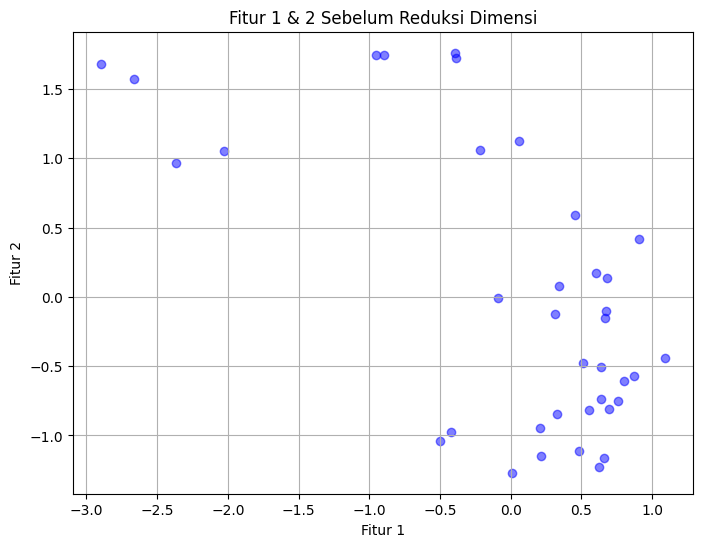

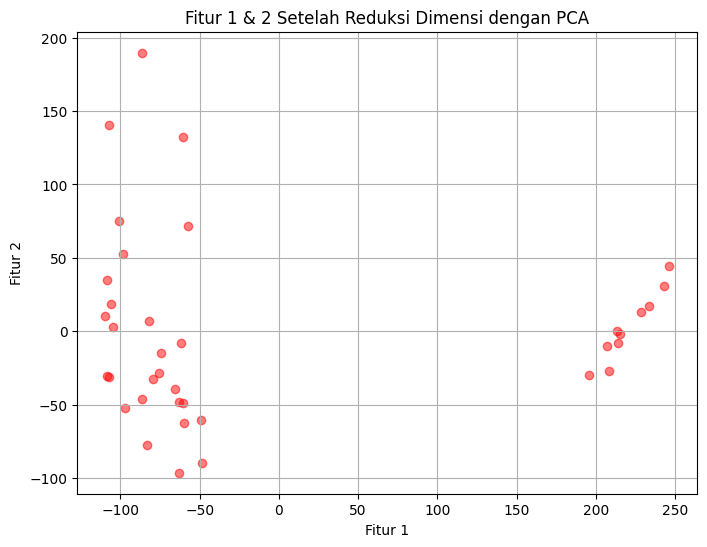

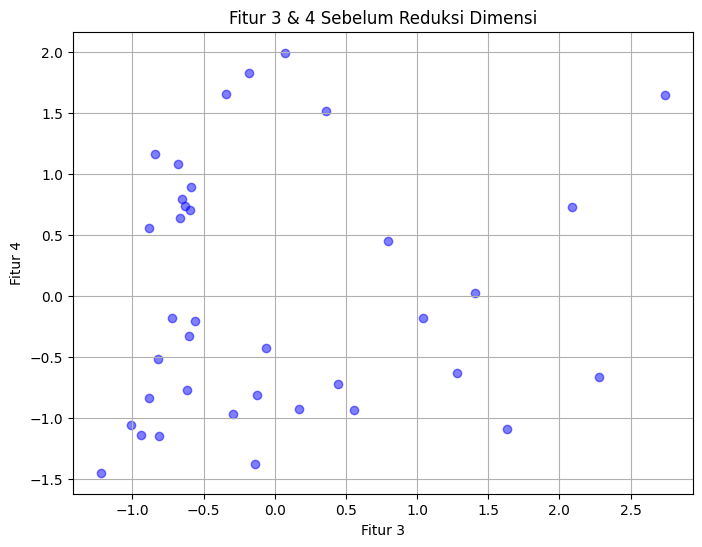

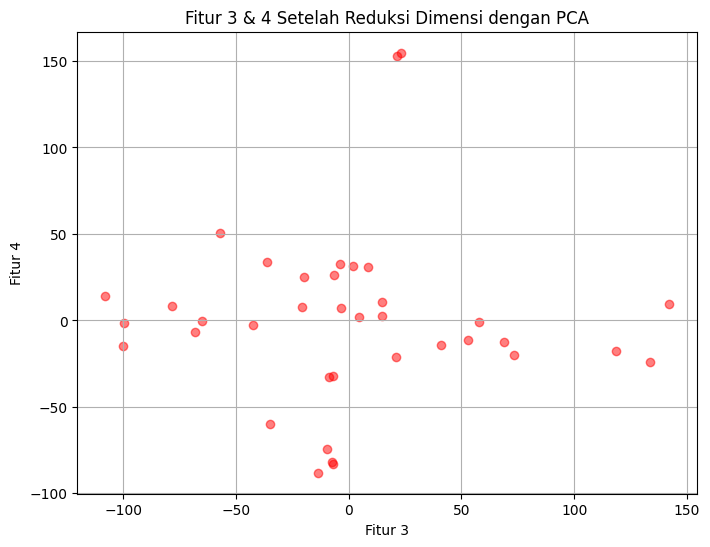

In [18]:
# List pasangan fitur yang ingin ditampilkan
fitur_pairs = [(0, 1), (2, 3)]
for i, (feat1, feat2) in enumerate(fitur_pairs, 1):
    # Visualisasi data sebelum reduksi dimensi
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, feat1], X_scaled[:, feat2], color='blue', alpha=0.5)
    plt.title(f'Fitur {feat1 + 1} & {feat2 + 1} Sebelum Reduksi Dimensi')
    plt.xlabel(f'Fitur {feat1 + 1}')
    plt.ylabel(f'Fitur {feat2 + 1}')
    plt.grid(True)
    plt.show()

    print("\n")

    # Visualisasi data setelah reduksi dimensi menggunakan PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled_pca[:, feat1], X_scaled_pca[:, feat2], color='red', alpha=0.5)
    plt.title(f'Fitur {feat1 + 1} & {feat2 + 1} Setelah Reduksi Dimensi dengan PCA')
    plt.xlabel(f'Fitur {feat1 + 1}')
    plt.ylabel(f'Fitur {feat2 + 1}')
    plt.grid(True)
    plt.show()

    print("\n")

# Training and Testing data split

In [19]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Jumlah sampel dalam set pelatihan:", len(X_train))
print("Jumlah sampel dalam set pengujian:", len(X_test))

Jumlah sampel dalam set pelatihan: 25
Jumlah sampel dalam set pengujian: 12


# Modeling

## Benchmark
ZEROR: 0.32    SVM: 0.81   MLP: 0.7    
DT: 0.41       NB: 0.62    RF: 0.78
HC: 0.51       KNN: 0.81   K-MEANS:0.62

In [20]:
def create_and_train_model(optimizer, layers, X_train, y_train_encoded, X_test, y_test_encoded):
    model = tf.keras.Sequential(layer)
    model.compile(optimizer=optimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test_encoded)

    y_preds = model.predict(X_test)
    y_preds_labels = np.argmax(y_preds, axis=1)
    print(classification_report(y_test, y_preds_labels))

    return history, loss, accuracy, y_preds

In [21]:
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

model_names = []
histories = []
losses = []
accuracies = []

layers = [
    [
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(num_features,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(250, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='sigmoid')
    ],
    [
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(num_features,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='sigmoid')
    ],
    [
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(num_features,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(250, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='sigmoid')
    ],
    [
        tf.keras.layers.Dense(1000, activation='relu', input_shape=(num_features,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='sigmoid')
    ]
]

best_accuracy = 0
best_model = None

optimizers = [Adam, Adagrad, RMSprop]
# optimizers = [SGD]
for o, optimizer in enumerate(optimizers, 1):
  print(f">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Optimizer: {optimizer}")
  # for h in range(10):
  for i, layer in enumerate(layers, 1):
    print(f"Training Model {i}...")

    y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes)
    y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)
    history, loss, accuracy, y_preds = create_and_train_model(
        optimizer,
        layer,
        X_train,
        y_train_encoded,
        X_test,
        y_test_encoded
    )

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = f"optimizer: {o}, model: {i}"


    model_names.append(f"Optimizer: {o}, Model: {i}")
    histories.append(history)
    losses.append(loss)
    accuracies.append(accuracy)

    # print(f"Model {i} - Training Selesai. Evaluasi: Loss = {loss}, Accuracy = {accuracy}")
  print(f"Model terbaik: {best_model}, memiliki akurasi tertinggi: {best_accuracy}")

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Optimizer: <class 'keras.src.optimizers.adam.Adam'>
Training Model 1...
1/1 [==============================] - 0s 110ms/step
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.40      0.67      0.50         3
           2       1.00      0.67      0.80         3
           3       1.00      0.50      0.67         4

    accuracy                           0.58        12
   macro avg       0.68      0.58      0.59        12
weighted avg       0.74      0.58      0.61        12

Training Model 2...
1/1 [==============================] - 0s 65ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.33      0.33      0.33         3
           2       1.00      0.67      0.80         3
           3       1.00      0.75      0.86         4

    accuracy                           0.67        12
   macro a

# Accuracy and Loss Results

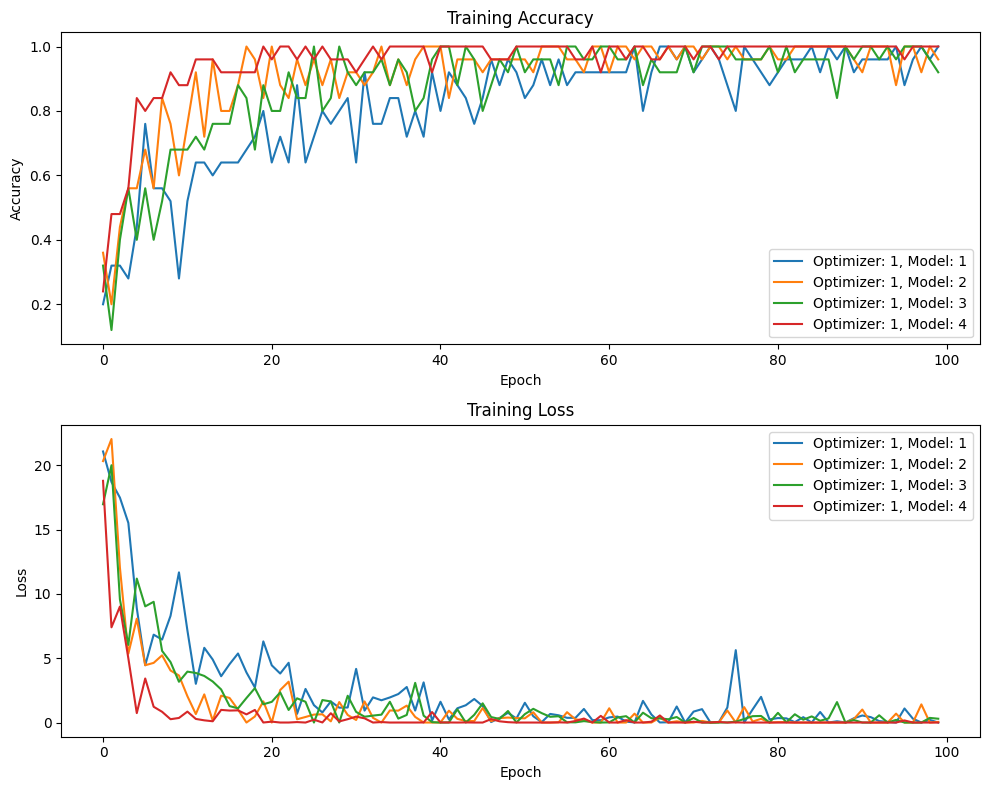

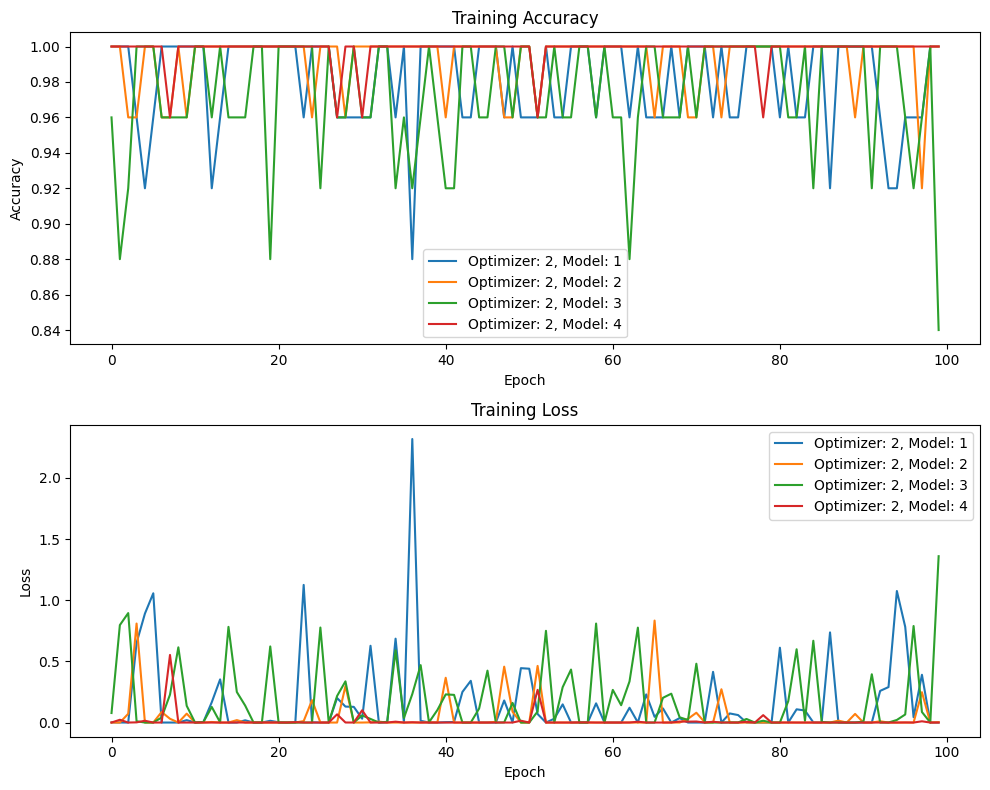

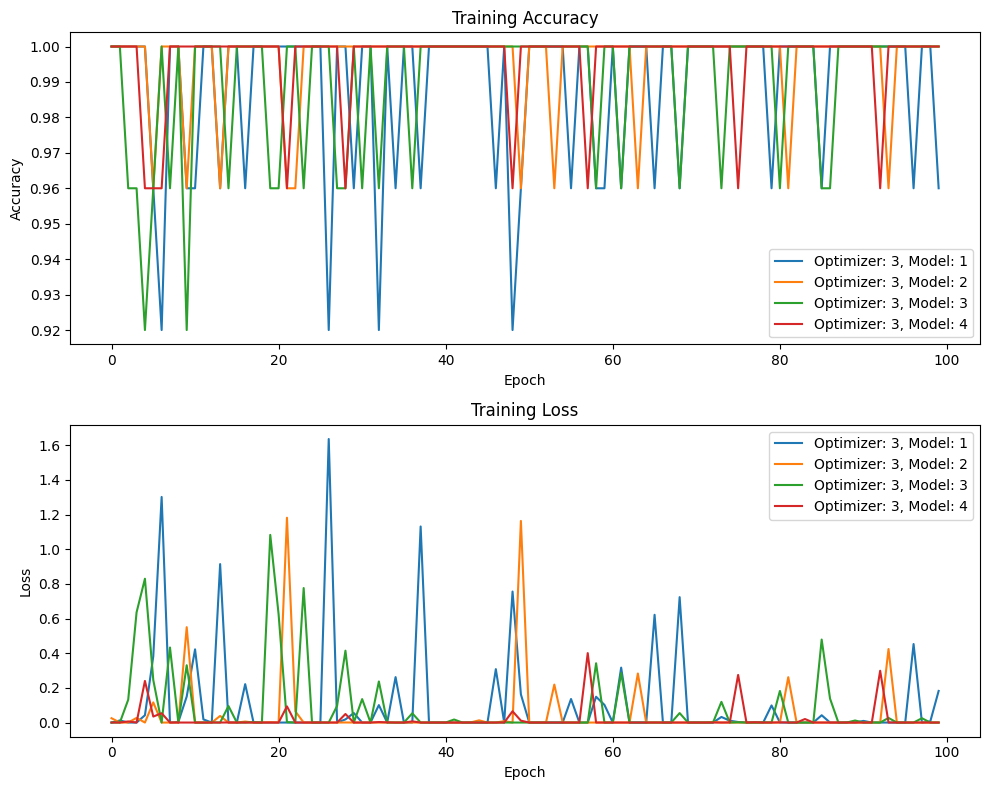

In [38]:
def plot_generator_multi(history_list, label_list, xlabel, ylabel, title):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    for i, history in enumerate(history_list):
        axes[0].plot(history.history['accuracy'], label=label_list[i])
        axes[1].plot(history.history['loss'], label=label_list[i])

    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel[0])
    axes[0].set_title(title[0])
    axes[0].legend()

    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel[1])
    axes[1].set_title(title[1])
    axes[1].legend()

    plt.tight_layout()
    plt.show()

xlabel = 'Epoch'
ylabel = ['Accuracy', 'Loss']
title = ['Training Accuracy', 'Training Loss']

plot_generator_multi(histories[0:4], model_names[0:4], xlabel, ylabel, title)
plot_generator_multi(histories[4:8], model_names[4:8], xlabel, ylabel, title)
plot_generator_multi(histories[8:12], model_names[8:12], xlabel, ylabel, title)

# Experiment using KFold

In [23]:
# from sklearn.model_selection import KFold

# # Split data using K-Fold cross-validation
# kf = KFold(n_splits=2, shuffle=True)

# best_accuracy = 0
# best_model = None

# for i, (train_index, test_index) in enumerate(kf.split(X_scaled_pca)):
#     print(f"\nFold {i}:")
#     X_train_fold, X_test_fold = X_scaled_pca[train_index], X_scaled_pca[test_index]
#     y_train_fold, y_test_fold = y[train_index], y[test_index]

#     for optimizer in optimizers:
#         for i, layer in enumerate(layers, 1):
#             print(f"Training Model {i} with Cross-validation Fold...")
#             history, loss, accuracy = create_and_train_model(
#                 optimizer,
#                 layer,
#                 X_train_fold,
#                 y_train_fold,
#                 X_test_fold,
#                 y_test_fold
#             )

#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_model = f"model {i}"

#             model_names.append(f"Model {i}")
#             histories.append(history)
#             losses.append(loss)
#             accuracies.append(accuracy)

#             print(f"Model {i} - Training Selesai. Evaluasi: Loss = {loss}, Accuracy = {accuracy}")
#             import time
#             time.sleep(3)

# print(f"Model terbaik: {best_model}, memiliki akurasi tertinggi: {best_accuracy}")